In [194]:
#import libraries
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
import sklearn
from sklearn.cluster import KMeans

In [195]:
#get data , parse datetime
data=pd.read_csv('OnlineRetail.csv',parse_dates=[4],encoding = "ISO-8859-1")

In [196]:
#display first 5 rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [197]:
#display information about the dtype for each attribute/column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [198]:
#nrow and ncol
data.shape

(541909, 8)

In [199]:
#find missing values and percentage of missing values
total=data.isnull().sum().sort_values(ascending=False)

percent=data.isnull().sum()/data.isnull().count()

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
CustomerID,135080,0.249267
Description,1454,0.002683
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [200]:
#drop all the rows with na values for customer ID
data=data.dropna(axis=0,subset=['CustomerID'])

In [201]:
data['InvoiceDate'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  406829
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [202]:
#customerId was float. convert to int
data['CustomerID']=data['CustomerID'].astype(int)

In [203]:
#extract time from invoicedate 
data['time']=data['InvoiceDate'].dt.time

In [204]:
#extract date from invoicedate
data['date']=data['InvoiceDate'].dt.date

In [205]:
#convert date to datetime dtype
data['date']=pd.to_datetime(data['date'])

Design and calculate the business metrices (KPI)

---



In [206]:
#revenue=Quantity * unit price
data['revenue']=data['UnitPrice']*data['Quantity']

In [207]:
#extract month-year from invoicedate
data['month-year']=data['InvoiceDate'].dt.to_period('M')

In [208]:
#create a new df of total revenue per month-year
rev_data=data.groupby(data['month-year'])['revenue'].sum().reset_index()

In [209]:
rev_data

,month-year,revenue
0,2010-12,554604.020
1,2011-01,475074.380
2,2011-02,436546.150
3,2011-03,579964.610
4,2011-04,426047.851
5,2011-05,648251.080
6,2011-06,608013.160
7,2011-07,574238.481
8,2011-08,616368.000
9,2011-09,931440.372


In [210]:
#nrow and ncol
rev_data.shape

(13, 2)

In [211]:
#rev_data['month-year']=rev_data['month-year'].astype('string')

In [212]:
#sns.scatterplot(x=rev_data['month-year'],y=rev_data['revenue'],linestyle='-')

In [213]:
#calculate the percentage change of revenve per month
rev_data['monthly_change']=rev_data['revenue'].pct_change()

In [214]:
#rev_data=rev_data.drop(rev_data.index[len(rev_data)-1])

In [215]:
avg_data=data.groupby(data['month-year'])['revenue'].mean().reset_index()

In [216]:
quant_data=data.groupby(data['month-year'])['Quantity'].sum().reset_index()

In [217]:
cust_data=data.groupby(data['month-year'])['CustomerID'].nunique().reset_index()

In [218]:
rev_data=pd.merge(pd.merge(pd.merge(rev_data,avg_data, on="month-year"),cust_data,on="month-year"),quant_data,on="month-year")

In [219]:
rev_data.columns=['month-year','tot_rev','monthly_chg_rev','avg_rev','tot_cust','quantity']

In [220]:
rev_data

,month-year,tot_rev,monthly_chg_rev,avg_rev,tot_cust,quantity
0,2010-12,554604.020,NaN,20.655643,948,296362
1,2011-01,475074.380,-0.143399,21.681014,783,269379
2,2011-02,436546.150,-0.081099,21.438204,798,262833
3,2011-03,579964.610,0.328530,20.845540,1020,344012
4,2011-04,426047.851,-0.265390,18.365715,899,278585
5,2011-05,648251.080,0.521545,22.424626,1079,367852
6,2011-06,608013.160,-0.062072,21.842691,1051,356922
7,2011-07,574238.481,-0.055549,20.879881,993,363418
8,2011-08,616368.000,0.073366,22.282120,980,386612
9,2011-09,931440.372,0.511176,22.817118,1302,537496


In [221]:
#store in csv file
rev_data.to_csv('rev_data.csv')

In [222]:
country_avg_rev=data.groupby(data['Country'])['revenue'].mean().reset_index()

In [223]:
country_avg_rev

,Country,revenue
0,Australia,108.877895
1,Austria,25.322494
2,Bahrain,32.258824
3,Belgium,19.773301
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,26.499063
7,Cyprus,20.813971
8,Czech Republic,23.590667
9,Denmark,48.247147


In [224]:
country_cust=data.groupby(data['Country'])['CustomerID'].nunique().reset_index()

In [225]:
country_cust

,Country,CustomerID
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,9
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


In [226]:
country_rev=data.groupby(data['Country'])['revenue'].sum().reset_index()

In [227]:
country_rev

,Country,revenue
0,Australia,137077.270
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20086.290
7,Cyprus,12946.290
8,Czech Republic,707.720
9,Denmark,18768.140


In [228]:
country_quant=data.groupby(data['Country'])['Quantity'].nunique().reset_index()

In [229]:
country_quant

,Country,Quantity
0,Australia,67
1,Austria,23
2,Bahrain,8
3,Belgium,38
4,Brazil,7
5,Canada,19
6,Channel Islands,25
7,Cyprus,29
8,Czech Republic,12
9,Denmark,35


In [230]:
country_data=pd.merge(pd.merge(pd.merge(country_rev,country_avg_rev, on="Country"),country_cust,on="Country"),country_quant,on="Country")

In [231]:
country_data.columns=['Country','tot_rev','avg_rev','tot_cust','quantity']

In [232]:
country_data.to_csv('country_data.csv')

In [233]:
data=data.assign(Occurence=np.where(~data['CustomerID'].duplicated(),'New','Existing'))

In [234]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,time,date,revenue,month-year,Occurence
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,08:26:00,2010-12-01,15.30,2010-12,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,20.34,2010-12,Existing
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,08:26:00,2010-12-01,22.00,2010-12,Existing
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,20.34,2010-12,Existing
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,20.34,2010-12,Existing


plot new-month , 

In [235]:
#occu_rev=data.groupby(by=(data['month-year'],data['Occurence']))['Revenue'].sum().reset_index()

In [236]:
group=data.groupby('CustomerID')['month-year']

In [237]:
data['cohortMonth']=group.transform('min')

In [238]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,time,date,revenue,month-year,Occurence,cohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,08:26:00,2010-12-01,15.30,2010-12,New,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,20.34,2010-12,Existing,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,08:26:00,2010-12-01,22.00,2010-12,Existing,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,20.34,2010-12,Existing,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,20.34,2010-12,Existing,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,12:50:00,2011-12-09,10.20,2011-12,Existing,2011-08
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12:50:00,2011-12-09,12.60,2011-12,Existing,2011-08
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,12:50:00,2011-12-09,16.60,2011-12,Existing,2011-08
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,12:50:00,2011-12-09,16.60,2011-12,Existing,2011-08


In [239]:
def get_data_int(df,column):
  year=df[column].dt.year
  month=df[column].dt.month
  day=df[column].dt.day
  return year,month,day

In [240]:
invoice_year,invoice_month,_ = get_data_int(data,'month-year')
cohort_year, cohort_month,_=get_data_int(data,'cohortMonth')

In [241]:
year_diff=invoice_year - cohort_year
months_diff=invoice_month - cohort_month

In [242]:
data['cohortIndex']=year_diff * 12 + months_diff +1
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,time,date,revenue,month-year,Occurence,cohortMonth,cohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,08:26:00,2010-12-01,15.30,2010-12,New,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,20.34,2010-12,Existing,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,08:26:00,2010-12-01,22.00,2010-12,Existing,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,20.34,2010-12,Existing,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,20.34,2010-12,Existing,2010-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,12:50:00,2011-12-09,10.20,2011-12,Existing,2011-08,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12:50:00,2011-12-09,12.60,2011-12,Existing,2011-08,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,12:50:00,2011-12-09,16.60,2011-12,Existing,2011-08,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,12:50:00,2011-12-09,16.60,2011-12,Existing,2011-08,5


In [243]:
#monthly active customers from each cohort
cohort_data=data.groupby(['cohortMonth','cohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()


In [244]:
cohort_counts=cohort_data.pivot_table(index='cohortMonth',
                                columns='cohortIndex',
                                values='CustomerID')

In [245]:
cohort_counts

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
cohort_size=cohort_counts.iloc[:,0]

In [247]:
cohort_size

cohortMonth
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Freq: M, Name: 1, dtype: float64

In [248]:
retention=cohort_counts.divide(cohort_size,axis=0)

In [249]:
retention.round(3)

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


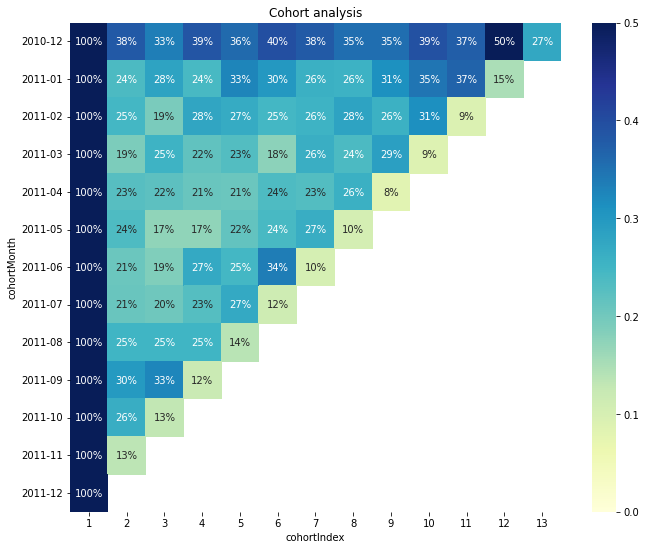

In [250]:
plt.figure(figsize=(11,9))
plt.title('Cohort analysis')
sns.heatmap(data=retention,annot=True,vmin=0.0,fmt='.0%',vmax=0.5,cmap='YlGnBu')
plt.show()

In [251]:
cohort_data2=data.groupby(['cohortMonth','cohortIndex'])['Quantity'].mean().reset_index()


In [252]:
quant=cohort_data2.pivot_table(index='cohortMonth',
                                columns='cohortIndex',
                                values='Quantity')

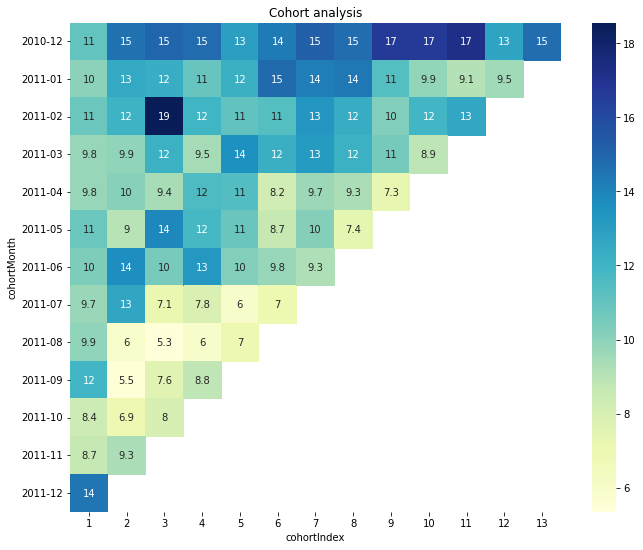

In [253]:
plt.figure(figsize=(11,9))
plt.title('Cohort analysis')
sns.heatmap(data=quant,annot=True,cmap='YlGnBu')
plt.show()

In [254]:
cohort_data3=data.groupby(['cohortMonth','cohortIndex'])['revenue'].mean().reset_index()


In [255]:
avg_rev=cohort_data3.pivot_table(index='cohortMonth',
                                columns='cohortIndex',
                                values='revenue')

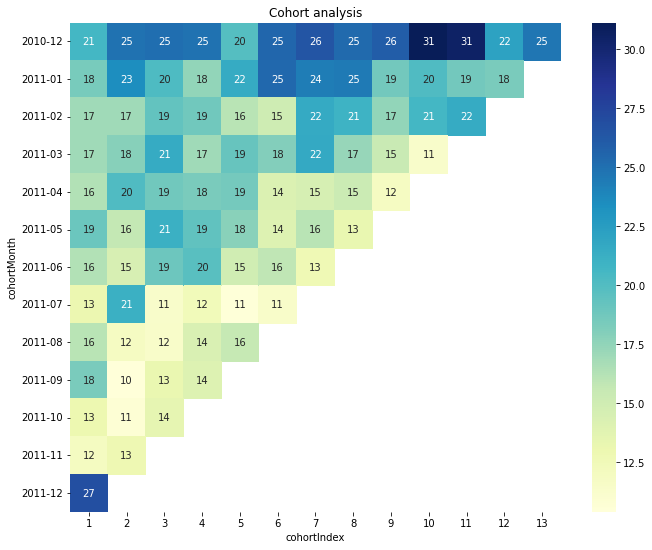

In [256]:
plt.figure(figsize=(11,9))
plt.title('Cohort analysis')
sns.heatmap(data=avg_rev,annot=True,cmap='YlGnBu')
plt.show()

In [257]:
import datetime as dt
PRESENT = dt.datetime(2011,12,10)
rfm=data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'revenue': lambda price: price.sum()})

In [258]:
rfm.columns=['monetary','frequency','recency']

In [259]:
rfm['recency']=rfm['recency'].astype(int)

In [260]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346,325,2,0
12347,2,182,4310
12348,75,31,1797
12349,18,73,1757
12350,310,17,334


In [261]:
r_labels = range(3, 0, -1)
f_labels = range(1, 4)
m_labels = range(1, 4)

In [262]:
r_groups = pd.qcut(rfm['recency'], q=3, labels=r_labels)

In [263]:
f_groups = pd.qcut(rfm['frequency'], q=3, labels=f_labels)

In [264]:
m_groups = pd.qcut(rfm['monetary'], q=3, labels=m_labels)

In [265]:
rfm = rfm.assign(R=r_groups.values, F=f_groups.values,M=m_groups.values)

In [266]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [267]:
rfm.head()

,monetary,frequency,recency,R,F,M,RFM_Score
CustomerID,,,,,,,
12346,325,2,0,3,1,3,7
12347,2,182,4310,1,3,1,5
12348,75,31,1797,1,2,2,5
12349,18,73,1757,1,2,1,4
12350,310,17,334,3,1,3,7


In [268]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9)):
        return 'Middle'
    else:
        return 'Low'

In [269]:
rfm['RFM_labels']=rfm.apply(rfm_level,axis=1)

In [270]:
rfm=rfm.reset_index()

In [271]:
rfm.head()

,CustomerID,monetary,frequency,recency,R,F,M,RFM_Score,RFM_labels
0,12346,325,2,0,3,1,3,7,Middle
1,12347,2,182,4310,1,3,1,5,Middle
2,12348,75,31,1797,1,2,2,5,Middle
3,12349,18,73,1757,1,2,1,4,Low
4,12350,310,17,334,3,1,3,7,Middle


In [272]:
rfm.shape

(4372, 9)

In [273]:
rfm_level_agg = rfm.groupby('RFM_labels').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']}).round(1)

In [274]:
rfm_level_agg

recency frequency monetary      
              mean      mean     mean count
RFM_labels                                 
Low         2045.6      34.8     16.2   209
Middle      1895.2      96.0     95.0  4151
Top          294.6      85.2    206.9    12

In [275]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(rfm['RFM_labels'])
rfm['RFM_labels'] = labelEncoder.transform(rfm['RFM_labels'])

In [276]:
test=rfm.sample(frac=0.2).reset_index()

train =rfm.drop(test.index).reset_index()


In [277]:
test=test.drop(test[['index']],axis=1)
train=train.drop(train[['index']],axis=1)


In [278]:
train.head()

,CustomerID,monetary,frequency,recency,R,F,M,RFM_Score,RFM_labels
0,13505,67,227,4282,1,3,2,6,1
1,13506,312,29,452,2,2,3,7,1
2,13507,3,162,2479,1,3,1,5,1
3,13508,243,12,110,3,1,3,7,1
4,13509,8,44,979,2,2,1,5,1


In [279]:
test.columns

Index(['CustomerID', 'monetary', 'frequency', 'recency', 'R', 'F', 'M',
       'RFM_Score', 'RFM_labels'],
      dtype='object')

In [280]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm[['CustomerID','monetary','frequency','recency','R','F','M','RFM_Score']]=scaler.fit_transform(rfm[['CustomerID','monetary','frequency','recency','R','F','M','RFM_Score']])

In [281]:
rfm.head()

,CustomerID,monetary,frequency,recency,R,F,M,RFM_Score,RFM_labels
0,-1.715067,2.316568,-0.391720,-0.230943,1.223275,-1.204551,1.229241,1.007464,1
1,-1.714486,-0.889050,0.382657,0.293489,-1.226077,1.227919,-1.205297,-0.971257,1
2,-1.713906,-0.164560,-0.266959,-0.012288,-1.226077,0.011684,0.011972,-0.971257,1
3,-1.713325,-0.730258,-0.086271,-0.017155,-1.226077,0.011684,-1.205297,-1.960618,0
4,-1.712744,2.167700,-0.327188,-0.190303,1.223275,-1.204551,1.229241,1.007464,1


In [282]:
train.head()

,CustomerID,monetary,frequency,recency,R,F,M,RFM_Score,RFM_labels
0,13505,67,227,4282,1,3,2,6,1
1,13506,312,29,452,2,2,3,7,1
2,13507,3,162,2479,1,3,1,5,1
3,13508,243,12,110,3,1,3,7,1
4,13509,8,44,979,2,2,1,5,1


In [283]:
test.head()

,CustomerID,monetary,frequency,recency,R,F,M,RFM_Score,RFM_labels
0,15508,189,92,1000,2,3,3,8,1
1,12990,31,13,409,2,1,2,5,1
2,12550,79,57,964,2,2,2,6,1
3,12518,0,124,2056,1,3,1,5,1
4,18143,116,61,1000,2,2,3,7,1


In [284]:
test.shape

(874, 9)

In [285]:
train.shape

(3498, 9)

In [286]:
wcss=[]
for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(train)                              
    wcss.append(model.inertia_)

  

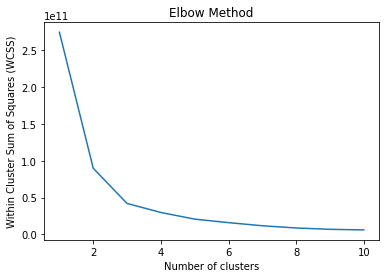

In [287]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [288]:
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3,
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0) 

# Fit k-means clustering on the normalized data set
kmeans.fit_predict(rfm)

# Extract cluster labels
rfm['cluster'] = kmeans.labels_

In [289]:
kmeans.cluster_centers_

array([[ 0.04353081,  0.88735574, -0.27747762, -0.17752498,  0.75479794,
        -0.65391739,  0.9533539 ,  0.85268866,  1.0066335 ],
       [-0.03056868, -0.62518065,  0.14106521,  0.05902681, -0.52948513,
         0.45793866, -0.67038559, -0.60010141,  0.91807134],
       [-0.06387844, -0.86589255, 11.84163912, 14.21377444, -1.22607664,
         1.22791888, -1.20529686, -0.97125711,  1.        ]])

In [292]:
y_pred=kmeans.predict(test)

In [295]:
test['cluster']=y_pred

In [296]:
test

,CustomerID,monetary,frequency,recency,R,F,M,RFM_Score,RFM_labels,cluster
0,15508,189,92,1000,2,3,3,8,1,2
1,12990,31,13,409,2,1,2,5,1,2
2,12550,79,57,964,2,2,2,6,1,2
3,12518,0,124,2056,1,3,1,5,1,2
4,18143,116,61,1000,2,2,3,7,1,2
...,...,...,...,...,...,...,...,...,...,...
869,14001,45,40,2030,1,2,2,5,1,2
870,13669,50,9,218,3,1,2,6,1,2
871,13301,103,81,618,2,3,3,8,1,2
872,14423,218,3,265,3,1,3,7,1,2
